In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
sys.path.insert(0, str(Path("../src").resolve()))

In [2]:
from contour_based_image_rectification import load_image, rectify

image = load_image("../data/warped_document_multifold_color.jpg")
mask = load_image("../data/warped_document_multifold_color_mask.jpg")
mask = (mask > 128).any(axis=2)

# optionaly provide corners of the mask (speeds up the rectification significantly)
corners = [(428, 520), (1552, 787), (1482, 1370), (270, 1087)]

image_rectified = rectify(image=image, mask=mask, output_shape=(500, 1000))

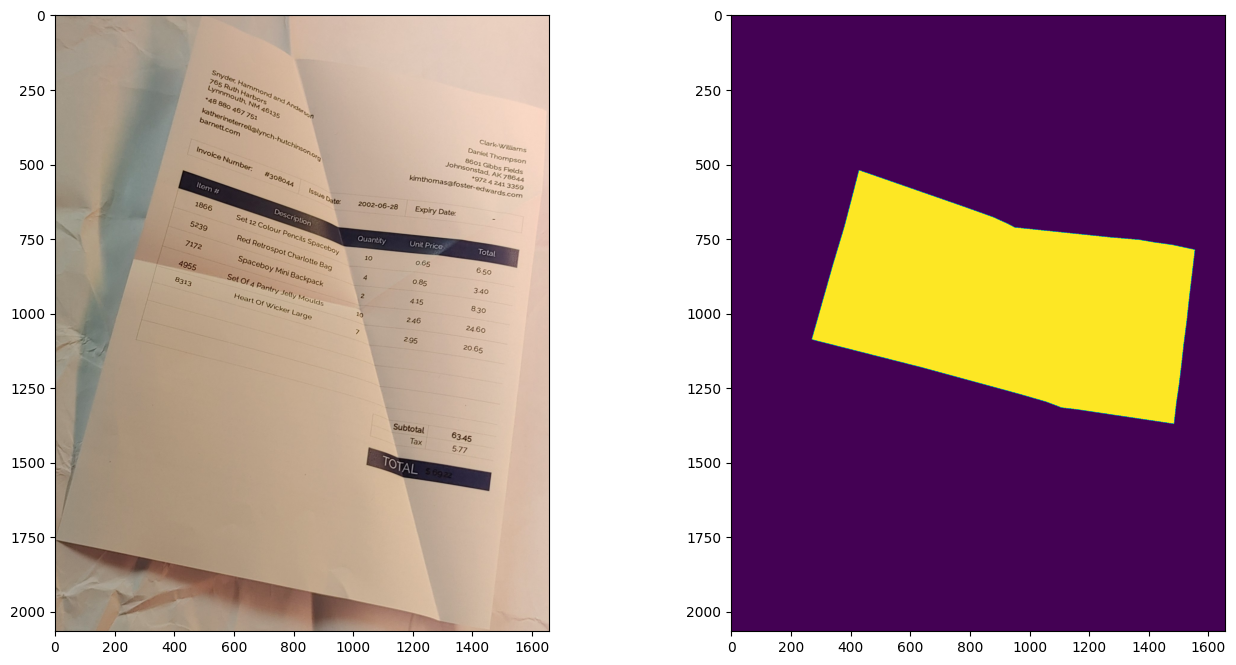

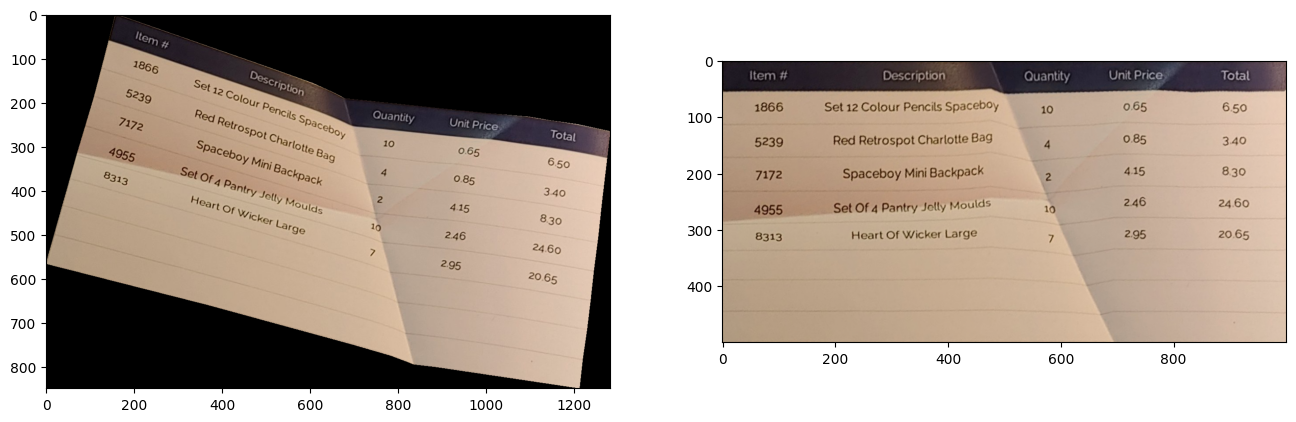

In [3]:
from contour_based_image_rectification.util.image import tight_crop_image
import matplotlib.pyplot as plt

masked_image = image.copy()
masked_image[~mask, :] = 0
masked_image = tight_crop_image(masked_image, mask)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(masked_image)
plt.subplot(1, 2, 2)
plt.imshow(image_rectified)
plt.show()